In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import pandas
import statsmodels.formula.api as smf

In [146]:
def inspectingDiff():
    np.random.seed(0)
    x = 2.5 * np.random.randn(100) + 1.5 # array of 100 values with mean 1.5, stddev= 2.5
    res = 0.5 * np.random.randn(100) # Generate 100 residual terms
    y = 2 + 0.3 * x + res # actual values of y
    
    # create pandas data frame to store our x and y values
    df = pd.DataFrame({'X':x,'Y':y})
    
    # show the first five rows our dataframe
    print(df.head())
    
    # calculate the mean of x and y
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    # calculate the terms needed for the numator and demnominator of beta
    df['xycov'] = (df['X'] - xmean) * (df['Y'] - ymean)
    df['xvar'] = (df['X'] - xmean)**2 # var ** 2 means squaring the var
    
    # calcualte beta and alpha
    #print("XY cov is : ",df['xycov'])
    #print("X var is : ",df['xvar'])
    
    beta = df['xycov'].sum() / df['xvar'].sum()
    alpha = ymean - (beta * xmean)
    
    ypred = alpha + beta*x
    
    #print("Value of alpha: ",alpha)
    #print("Value of beta: ",beta)
    #print("Value of predicted y: ",ypred)
    
    plt.figure(figsize = (12,6))
    plt.plot(x,ypred) # regression line
    plt.plot(x,y,'ro') # scatter plot showing actual data
    #plt.scatter(x,y)
    plt.title('Actual vs Predicted')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    
# Now that I know how to implement linnear regression from scratch
# I can now use ols model from statsmodels module

def statModel():
    advert = pd.read_csv("datasets_133357_317184_advertising.csv")
    print(advert['TV'].head())
    
    model = smf.ols('Sales ~ TV', data=advert)
    sales_pred = model.predict({"TV":400})
    
    plt.figure(figsize(12,6))
    plt.plot(advert['TV'],advert['Sales'],'o') # scatter plot showing actual data
    plt.plot(advert['TV'],sales_pred,'r',linewidth=2) # regression line
    plt.xlabel('TV advertising costs')
    plt.ylabel('Sales')
    plt.titile('TV vs Sales')
    plt.show()

In [147]:


def main():
    x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
    y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
    
    slope,intercept,r,p,std_err = stats.linregress(x,y)
    def myfunc(x):
        return slope * x + intercept
    mymodel = list(map(myfunc,x))
    plt.scatter(x,y,color="purple")
    plt.title("Linear regression")
    plt.plot(x,mymodel)
    plt.xlabel("Speed")
    plt.ylabel("time")
    plt.show()

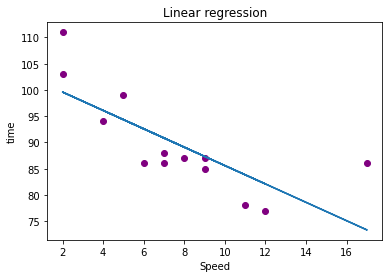

          X         Y
0  5.910131  4.714615
1  2.500393  2.076238
2  3.946845  2.548811
3  7.102233  4.615368
4  6.168895  3.264107


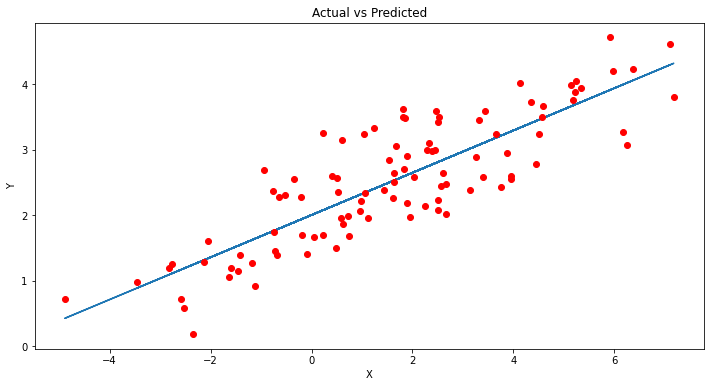

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64


TypeError: unsupported operand type(s) for *: 'float' and 'dict'

In [148]:
if __name__=="__main__":
    main()
    inspectingDiff()
    statModel()